<a href="https://colab.research.google.com/github/Ubaton/Database-Management/blob/master/World_Carbon_Emission_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [60]:
# Load data from URL
data_url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
df = pd.read_csv(data_url)

In [61]:
# Data Cleaning
df = df.fillna(0)
df['gdp_per_capita'] = np.where(df['population'] != 0, df['gdp'] / df['population'], 0)

In [62]:
# Panel Widgets
year_slider = pn.widgets.IntSlider(name='Year slider', start=1750, end=2020, step=5, value=1850)
yaxis_co2 = pn.widgets.RadioButtonGroup(
    name='Y axis',
    options=['co2', 'co2_per_capita'],
    button_type='success'
)
yaxis_co2_source = pn.widgets.RadioButtonGroup(
    name='Y axis',
    options=['coal_co2', 'oil_co2', 'gas_co2'],
    button_type='success'
)

In [63]:
# Data Filtering
continents = ['World', 'Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antarctica']
continents_excl_world = ['Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antarctica']

co2_pipeline = df[(df['year'] <= year_slider.value) & (df['country'].isin(continents))]

co2_vs_gdp_scatterplot_pipeline = df[(df['year'] == year_slider.value) & (~df['country'].isin(continents_excl_world))]

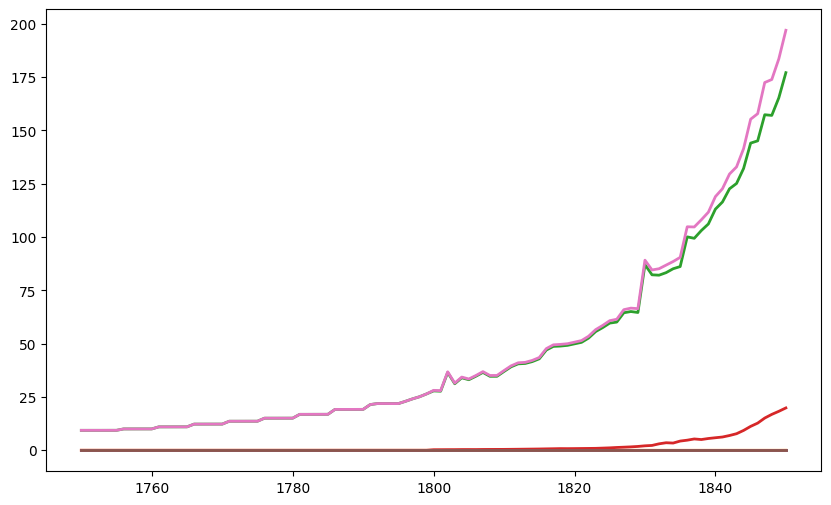

In [64]:
# Plots
co2_plot = plt.figure(figsize=(10, 6))
for country in co2_pipeline['country'].unique():
    data = co2_pipeline[co2_pipeline['country'] == country]
    plt.plot(data['year'], data[yaxis_co2.value], label=country, linewidth=2)

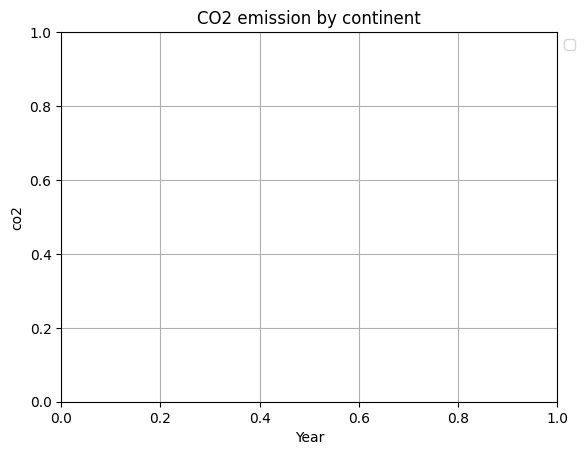

In [65]:
plt.title("CO2 emission by continent")
plt.xlabel("Year")
plt.ylabel(yaxis_co2.value)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

<ipython-input-66-6282266b3586>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=high_emission_countries, x='gdp_per_capita', y='co2', hue='country', palette='viridis', s=100, alpha=0.7)


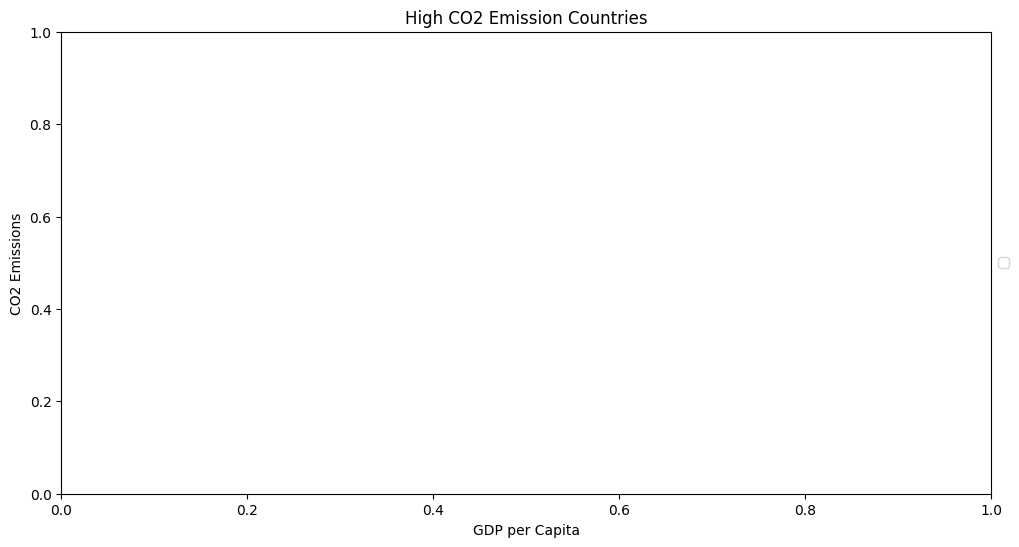

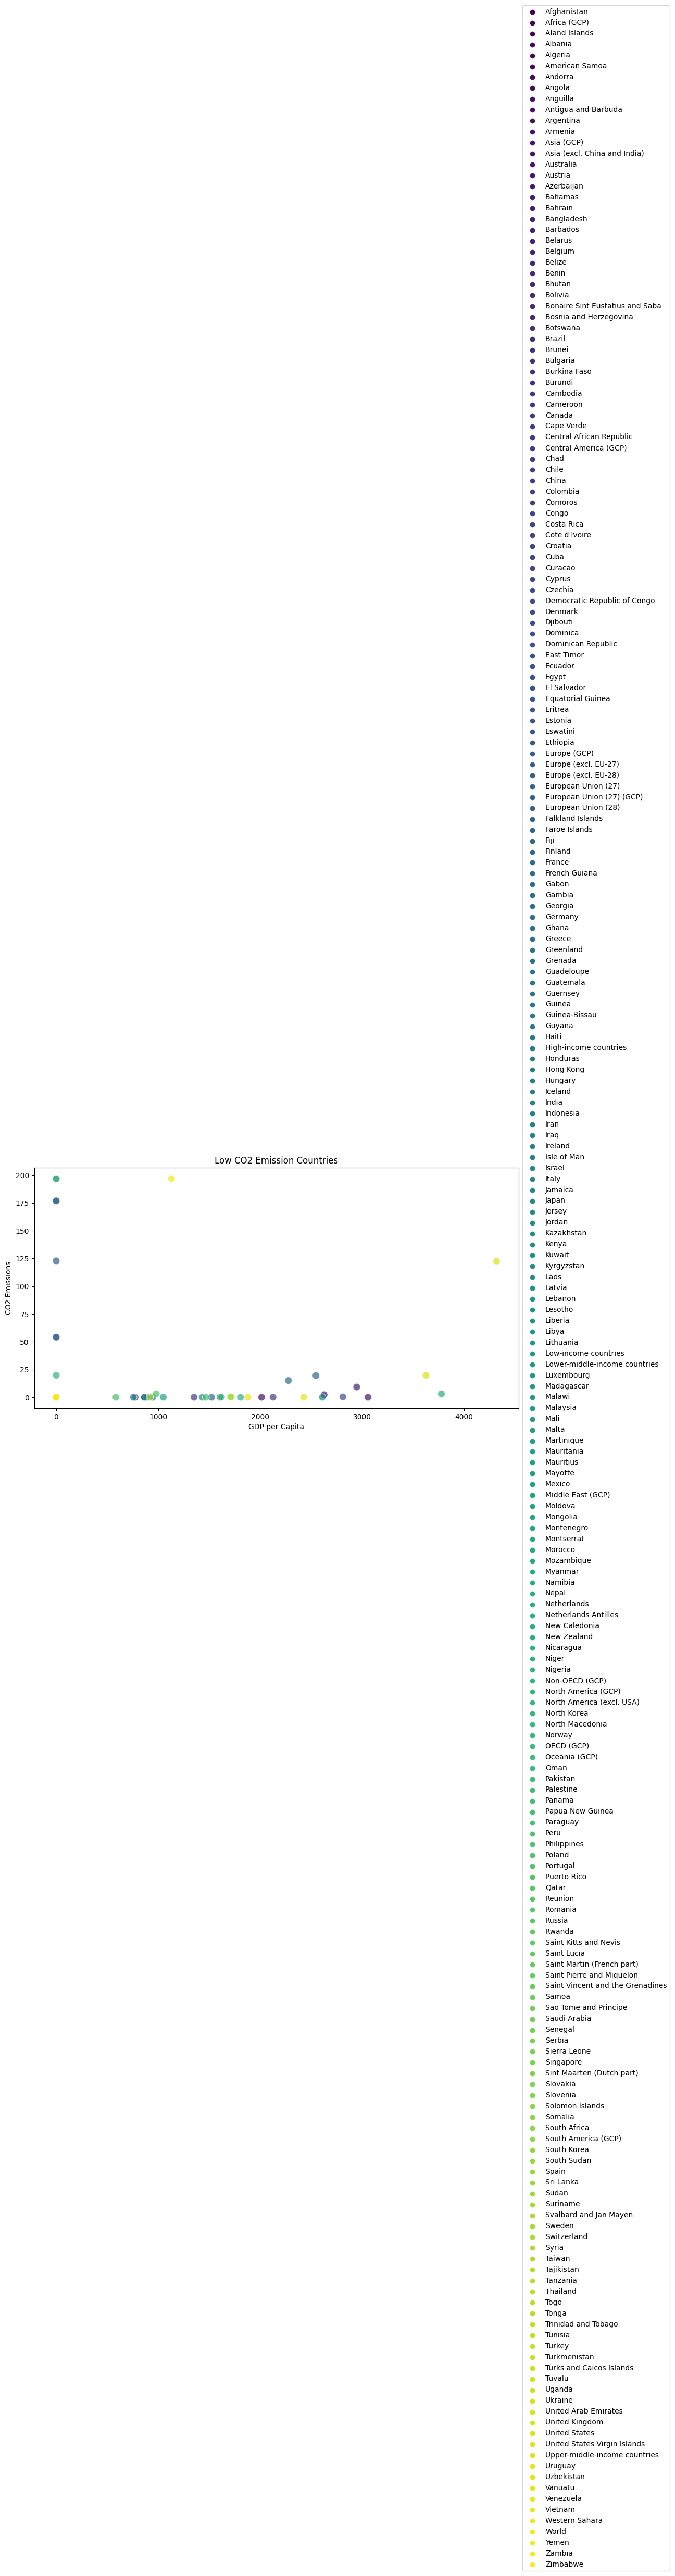

In [66]:
# Create Matplotlib scatter plot for high and low levels of emissions
high_emission_countries = co2_vs_gdp_scatterplot_pipeline[co2_vs_gdp_scatterplot_pipeline['co2'] > 1000]
low_emission_countries = co2_vs_gdp_scatterplot_pipeline[co2_vs_gdp_scatterplot_pipeline['co2'] <= 1000]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=high_emission_countries, x='gdp_per_capita', y='co2', hue='country', palette='viridis', s=100, alpha=0.7)
plt.title("High CO2 Emission Countries")
plt.xlabel("GDP per Capita")
plt.ylabel("CO2 Emissions")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=low_emission_countries, x='gdp_per_capita', y='co2', hue='country', palette='viridis', s=100, alpha=0.7)
plt.title("Low CO2 Emission Countries")
plt.xlabel("GDP per Capita")
plt.ylabel("CO2 Emissions")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [67]:
# Create the Panel Table
co2_table = co2_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size=10, sizing_mode='stretch_width')


In [68]:
# Define the dashboard layout
dashboard_title = pn.pane.Markdown("# CO2 Emissions and Climate Change")
dashboard_description = pn.pane.Markdown("#### Carbon dioxide emissions are the primary driver of global climate change. It’s widely recognized that to avoid the worst impacts of climate change, the world needs to urgently reduce emissions. But, how this responsibility is shared between regions, countries, and individuals has been an endless point of contention in international discussions.")

dashboard = pn.template.FastListTemplate(
    title='World CO2 emission dashboard',
    sidebar=[dashboard_title, dashboard_description, year_slider],
    main=[pn.Row(pn.Column(yaxis_co2, co2_plot), co2_table),
          pn.Row(pn.Column(), pn.Column())]
)


In [69]:
# Calculate the total CO2 emissions for high and low emission countries
total_high_emissions = high_emission_countries['co2'].sum()
total_low_emissions = low_emission_countries['co2'].sum()

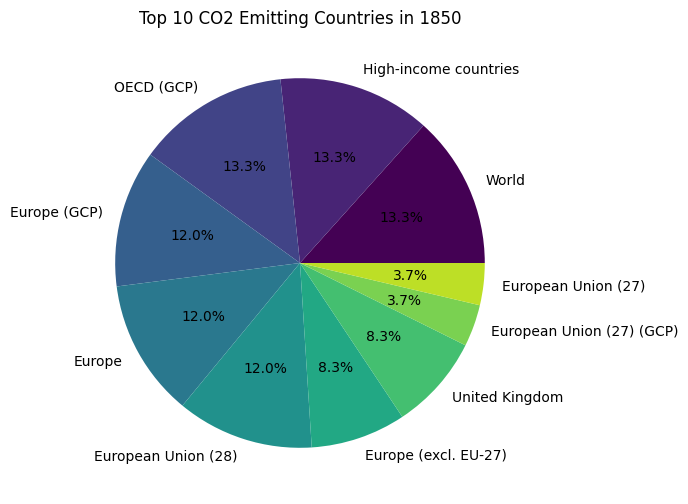

In [70]:
# Create a Pie Chart
total_co2_by_country = df[df['year'] == year_slider.value].groupby('country')['co2'].sum().sort_values(ascending=False).head(10)
colors = cm.viridis(np.arange(len(total_co2_by_country)) / len(total_co2_by_country))
plt.figure(figsize=(10, 6))
plt.pie(total_co2_by_country, labels=total_co2_by_country.index, autopct='%1.1f%%', colors=colors)
plt.title(f'Top 10 CO2 Emitting Countries in {year_slider.value}')
plt.show()

In [71]:
# Create a 'source' column based on available columns
df['source'] = df['cement_co2'] + df['coal_co2'] + df['oil_co2'] + df['gas_co2'] + df['flaring_co2']

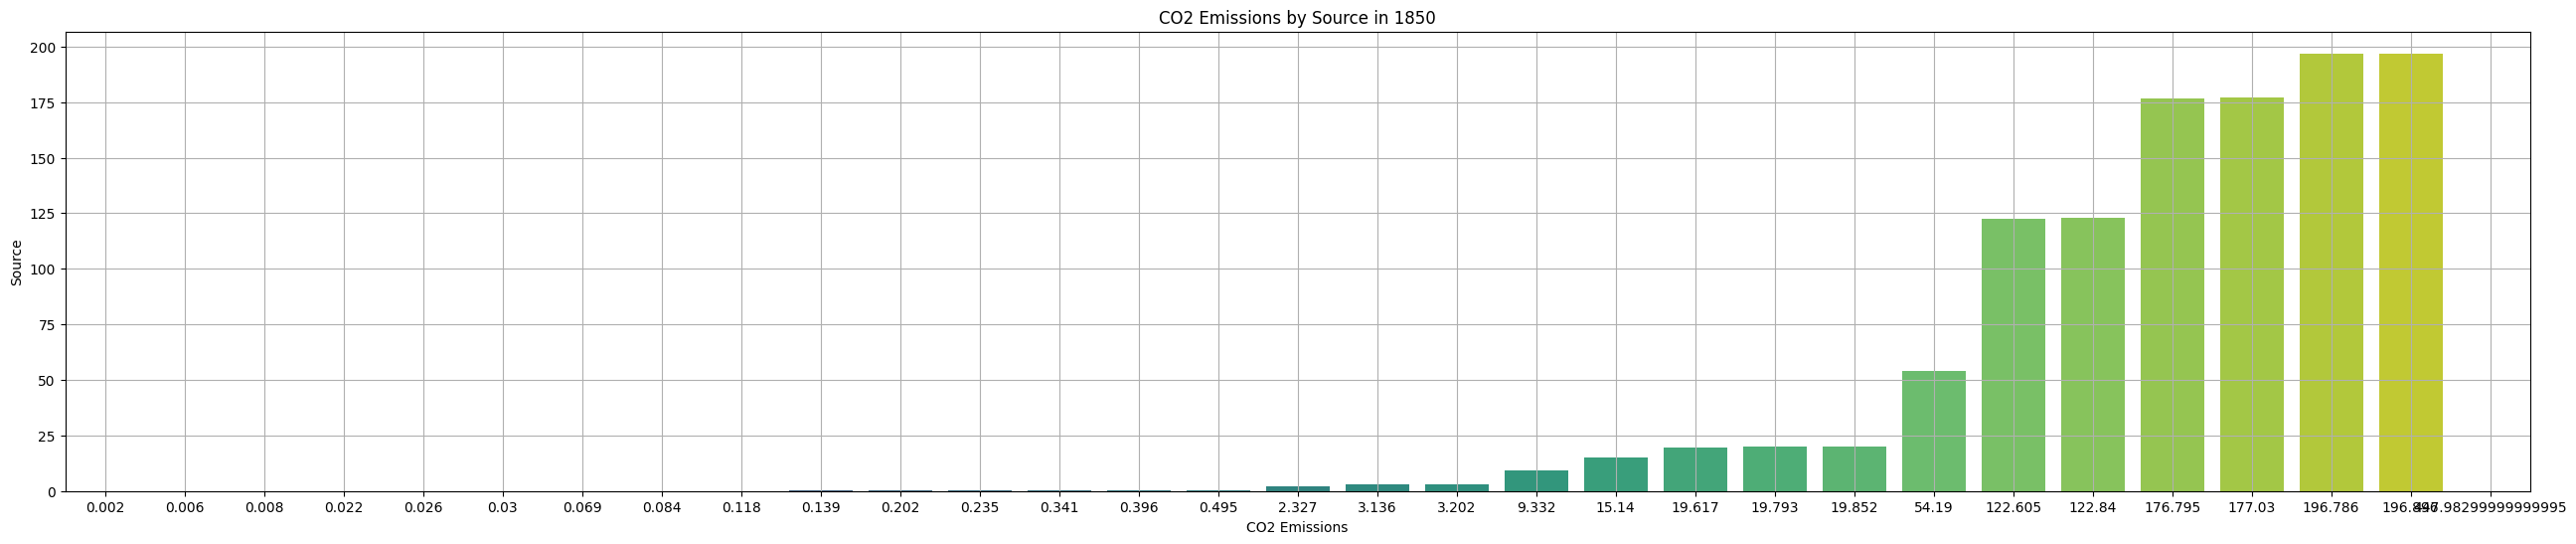

In [72]:
# Create a Bar Graph
total_co2_by_source = df[df['year'] == year_slider.value].groupby('source')['co2'].sum().sort_values(ascending=False)
plt.figure(figsize=(32, 6))
sns.barplot(x=total_co2_by_source.values, y=total_co2_by_source.index, palette='viridis')
plt.title(f'CO2 Emissions by Source in {year_slider.value}')
plt.xlabel('CO2 Emissions')
plt.ylabel('Source')
plt.grid(True)